Python Project
Analysis of growing elderly population in the United States: Population of long term nursing home residents - comparison of quality of care for non-profit and for-profit facilities. Analysis wether staffing hours reflect on long term residents well-being, can increasing of staffing hours improve patients well being? Proposing measure to improve quality of care for the long term nursing home residents etc

In [72]:
%matplotlib inline

In [73]:

import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
pop = pd.read_csv('data/population_usafacts.csv')
pop.head(30)

,Years,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Population (People),76094000,77584000,79163000,80632000,82166000,83822000,85450000,87008000.0,88710000.0,...,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331501080.0,331893745.0
1,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years of age (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19980936.0,19855184.0,19878806.0,19924706.0,19936737.0,19895016.0,19778527.0,19571339.0,19301292.0,NaN
3,5 to 14 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41146522.0,41232578.0,41200030.0,41105432.0,41084557.0,41113762.0,41100800.0,41041806.0,40992134.0,NaN
4,15 to 24 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43970419.0,44010321.0,43952354.0,43779770.0,43507796.0,43167197.0,42902176.0,42710397.0,42555684.0,NaN
5,25 to 34 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42304034.0,42854406.0,43475811.0,44073239.0,44775127.0,45319858.0,45679060.0,46003684.0,46069646.0,NaN
6,35 to 44 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40511710.0,40446168.0,40403298.0,40440626.0,40463900.0,40767905.0,41232094.0,41674444.0,42136192.0,NaN
7,45 to 54 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44255965.0,43749265.0,43329465.0,43013105.0,42703288.0,42227049.0,41571660.0,40860323.0,40366133.0,NaN
8,55 to 64 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38575865.0,39279688.0,39985560.0,40746246.0,41391871.0,41873702.0,42219277.0,42431225.0,42403677.0,NaN
9,65+ years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43132211.0,44632337.0,46161005.0,47655870.0,49208479.0,50757639.0,52354605.0,54036735.0,55659365.0,NaN


In [4]:

state_ave = pd.read_csv('data/NH_StateUSAverages_Mar2022.csv')
state_ave

,State or Nation,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,Cycle 3 Total Number of Fire Safety Deficiencies,Average Number of Residents per Day,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,...,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of high risk long stay residents with pressure ulcers,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who made improvements in function,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Processing Date
0,NATION,8.1,4.4,8.4,4.5,8.2,4.4,76.1,2.19,0.88,...,19.668208,8.331217,95.823852,73.117484,78.789996,22.868748,10.491720,1.446247,0.793767,2022-03-01
1,AK,7.8,7.8,11.9,5.1,12.8,9.5,35.3,4.73,0.67,...,17.222425,6.497252,97.293507,76.823628,81.053333,15.731127,10.859274,0.711204,0.814816,2022-03-01
2,AL,2.8,3.0,3.0,3.3,4.0,3.4,87.6,2.20,0.90,...,24.154599,9.364816,93.862901,70.674791,79.280988,22.683458,11.068544,1.650541,0.810642,2022-03-01
3,AR,8.9,1.9,11.2,2.1,7.8,2.3,68.0,2.45,1.04,...,21.733165,8.800134,97.176200,77.538899,77.074772,24.461910,12.332341,1.885729,1.145302,2022-03-01
4,AZ,7.5,3.2,8.0,3.2,5.6,3.6,72.8,2.23,1.10,...,17.122904,9.191160,96.941473,72.474653,88.374039,23.891657,9.618150,1.284218,0.616814,2022-03-01
5,CA,14.0,6.9,13.6,6.8,12.8,6.4,78.4,2.53,1.20,...,13.938415,7.730066,98.463390,79.060813,92.175048,22.955641,9.423089,1.562994,0.634867,2022-03-01
6,CO,7.5,6.5,9.5,5.6,8.7,6.2,64.1,2.20,0.69,...,12.437422,5.923840,94.928936,74.365184,72.712037,19.346138,10.291593,0.949105,0.726071,2022-03-01
7,CT,7.4,2.9,9.9,2.8,7.8,2.0,90.8,2.08,0.80,...,18.159471,5.878316,94.406648,74.749366,71.582115,23.397134,10.654462,1.365649,0.588280,2022-03-01
8,DC,14.1,2.2,15.8,2.5,13.2,4.1,117.1,2.53,0.65,...,12.785124,10.694040,97.466695,66.430327,76.361594,16.952946,6.427184,0.836020,0.328906,2022-03-01
9,DE,13.2,0.8,14.7,1.1,14.0,1.4,78.7,2.26,0.91,...,20.461909,6.031351,97.962649,76.064145,84.940556,20.317469,9.622023,1.374963,0.660657,2022-03-01


In [5]:
staffing = state_ave.filter(regex='Staffing')
#staffing = state_ave.filter(regex='State')
staffing 

,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day
0,2.19,0.88,0.70,1.58,3.76,0.07,0.37450,3.15730
1,4.73,0.67,1.97,2.64,7.37,0.07,0.33011,3.05524
2,2.20,0.90,0.61,1.51,3.71,0.04,0.30843,2.94093
3,2.45,1.04,0.38,1.42,3.87,0.03,0.30297,2.92749
4,2.23,1.10,0.75,1.85,4.08,0.12,0.39204,3.16524
5,2.53,1.20,0.63,1.83,4.36,0.09,0.40456,3.16271
6,2.20,0.69,0.95,1.64,3.84,0.09,0.34833,3.01802
7,2.08,0.80,0.74,1.54,3.63,0.08,0.33502,3.04147
8,2.53,0.65,1.80,2.45,4.97,0.11,0.50243,3.50316
9,2.26,0.91,1.18,2.09,4.35,0.09,0.34173,3.04356


In [6]:
long_stay = state_ave.filter(regex='long')
long_stay

,Percentage of long stay residents whose need for help with daily activities has increased,Percentage of long stay residents who lose too much weight,Percentage of low risk long stay residents who lose control of their bowels or bladder,Percentage of long stay residents with a catheter inserted and left in their bladder,Percentage of long stay residents with a urinary tract infection,Percentage of long stay residents who have depressive symptoms,Percentage of long stay residents who were physically restrained,Percentage of long stay residents experiencing one or more falls with major injury,Percentage of long stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of long stay residents who received an antipsychotic medication,Percentage of long stay residents whose ability to move independently worsened,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of high risk long stay residents with pressure ulcers,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days
0,15.650831,6.721291,47.120040,1.573436,2.438009,7.388876,0.171046,3.385799,93.267719,14.468181,22.094466,19.668208,8.331217,95.823852,1.446247,0.793767
1,11.778271,7.051415,39.156578,2.872281,3.532466,8.259307,0.259682,3.769294,95.616403,16.499538,23.757736,17.222425,6.497252,97.293507,0.711204,0.814816
2,14.115444,7.616959,41.978403,1.826009,3.182469,1.291478,0.737917,3.352214,93.033856,19.523315,20.104093,24.154599,9.364816,93.862901,1.650541,0.810642
3,13.717604,6.810043,42.273163,1.575070,2.371917,2.091665,0.227281,3.863767,94.431795,11.983685,16.338858,21.733165,8.800134,97.176200,1.885729,1.145302
4,13.567378,6.111603,53.094481,1.738824,1.523488,2.787418,0.144695,2.328816,96.866679,11.012468,24.664906,17.122904,9.191160,96.941473,1.284218,0.616814
5,9.185925,5.624824,33.569429,1.476837,1.229241,4.169621,0.242474,1.624840,98.033730,9.966051,16.189994,13.938415,7.730066,98.463390,1.562994,0.634867
6,15.850772,6.211679,47.400625,1.743782,2.156511,3.794788,0.075799,3.517889,89.994187,16.895499,22.122197,12.437422,5.923840,94.928936,0.949105,0.726071
7,16.447612,7.050222,42.530227,1.256163,1.955546,5.030850,0.016227,3.475760,89.178381,15.955427,24.935078,18.159471,5.878316,94.406648,1.365649,0.588280
8,17.236579,4.404594,62.464775,1.167336,1.945947,0.571551,0.539613,0.980193,93.861376,8.928867,29.344860,12.785124,10.694040,97.466695,0.836020,0.328906
9,16.034184,5.887010,50.401169,0.897858,2.176261,3.347549,0.167143,3.345562,95.136917,11.680675,25.153729,20.461909,6.031351,97.962649,1.374963,0.660657


In [15]:
?plot.bar


Object `plot.bar` not found.


TypeError: string indices must be integers

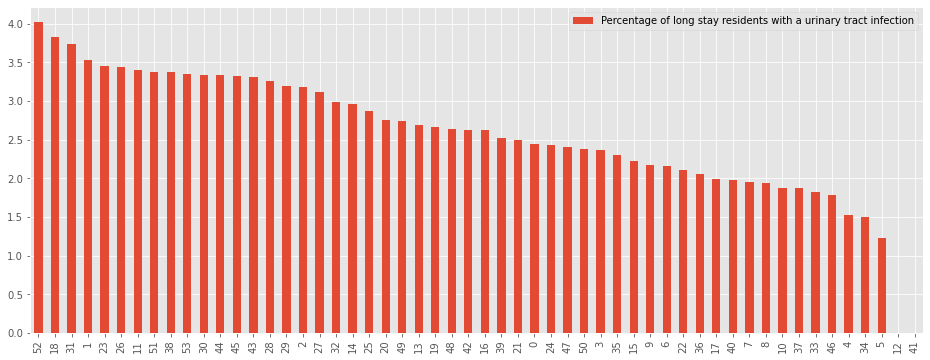

In [71]:
plt.rcParams["figure.figsize"] = [16, 6]
state_ave[['State or Nation','Percentage of long stay residents with a urinary tract infection']]\
.sort_values(ascending=False, by = 'Percentage of long stay residents with a urinary tract infection')\
.plot(kind = 'bar') #(color = 'b')

plt.title['The Elderly']

TypeError: 'str' object is not callable

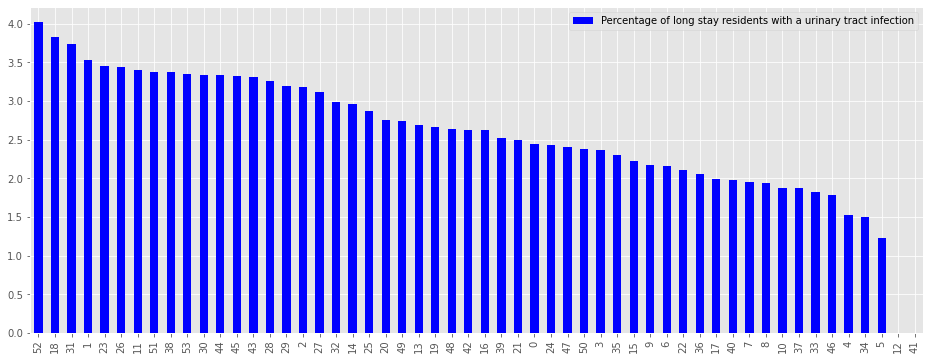

In [68]:
plt.rcParams["figure.figsize"] = [16, 6]
state_ave[['State or Nation','Percentage of long stay residents with a urinary tract infection']]\
.sort_values(ascending=False, by = 'Percentage of long stay residents with a urinary tract infection')\
.plot.bar(color = 'b')

plt.title('The Elderly')

In [85]:
?plt

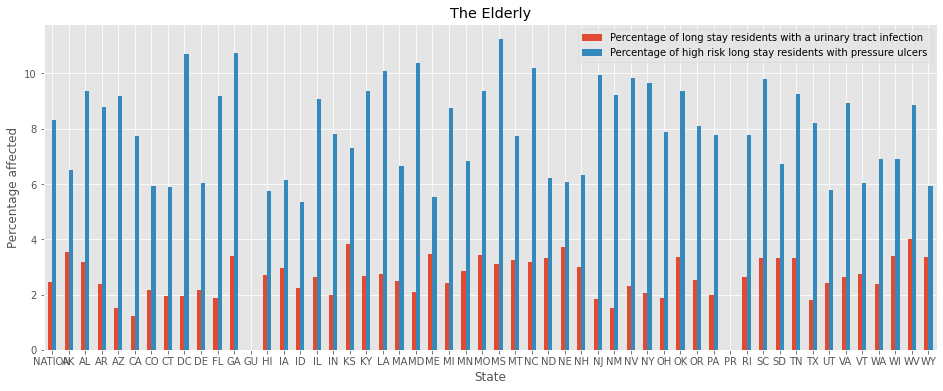

In [94]:
plt.rcParams["figure.figsize"] = [16, 6]

state_ave_plot = state_ave.plot.bar(x='State or Nation', \
                        y=['Percentage of long stay residents with a urinary tract infection'\
                           ,'Percentage of high risk long stay residents with pressure ulcers'], rot=0,\
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected')
#state_ave_plot.axis()



In [7]:
state_ave.columns.tolist()


['State or Nation',
 'Cycle 1 Total Number of Health Deficiencies',
 'Cycle 1 Total Number of Fire Safety Deficiencies',
 'Cycle 2 Total Number of Health Deficiencies',
 'Cycle 2 Total Number of Fire Safety Deficiencies',
 'Cycle 3 Total Number of Health Deficiencies',
 'Cycle 3 Total Number of Fire Safety Deficiencies',
 'Average Number of Residents per Day',
 'Reported Nurse Aide Staffing Hours per Resident per Day',
 'Reported LPN Staffing Hours per Resident per Day',
 'Reported RN Staffing Hours per Resident per Day',
 'Reported Licensed Staffing Hours per Resident per Day',
 'Reported Total Nurse Staffing Hours per Resident per Day',
 'Total number of nurse staff hours per resident per day on the weekend',
 'Registered Nurse hours per resident per day on the weekend',
 'Reported Physical Therapist Staffing Hours per Resident Per Day',
 'Total nursing staff turnover',
 'Registered Nurse turnover',
 'Number of administrators who have left the nursing home',
 'Case-Mix RN Staffing Ho

In [8]:
provider_data = pd.read_csv('data/NH_ProviderInfo_Mar2022.csv', encoding_errors='ignore')

provider_data

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,5.333,0,0,0.0,1,650.0,0,1,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,18.667,0,0,0.0,1,650.0,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,30.667,0,0,0.0,0,0.0,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.0,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2022-03-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,16.000,0,1,0.0,3,8333.0,0,3,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15211,686123,KENDALL LAKES HEALTH AND REHABILITATION CENTER,5280 SW 157 AVENUE,MIAMI,FL,33185,7864337400,120,Miami-Dade,For profit - Corporation,...,0.000,0,0,0.0,0,0.0,0,0,"5280 SW 157 AVENUE,MIAMI,FL,33185",2022-03-01
15212,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,3052716311,120,Miami-Dade,For profit - Corporation,...,61.600,0,2,2.0,1,13065.0,0,1,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
15213,745000,LAS ALTURAS DE PENITAS,414 LIBERTY BLVD.,PENITAS,TX,78576,5124392630,650,Hidalgo,For profit - Corporation,...,NaN,0,0,0.0,0,0.0,0,0,"414 LIBERTY BLVD.,PENITAS,TX,78576",2022-03-01
15214,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,5124382630,130,Bexar,For profit - Corporation,...,NaN,0,0,0.0,0,0.0,0,0,"4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249",2022-03-01


In [9]:
provider_data.columns.tolist()

['Federal Provider Number',
 'Provider Name',
 'Provider Address',
 'Provider City',
 'Provider State',
 'Provider Zip Code',
 'Provider Phone Number',
 'Provider SSA County Code',
 'Provider County Name',
 'Ownership Type',
 'Number of Certified Beds',
 'Average Number of Residents per Day',
 'Average Number of Residents per Day Footnote',
 'Provider Type',
 'Provider Resides in Hospital',
 'Legal Business Name',
 'Date First Approved to Provide Medicare and Medicaid Services',
 'Continuing Care Retirement Community',
 'Special Focus Status',
 'Abuse Icon',
 'Most Recent Health Inspection More Than 2 Years Ago',
 'Provider Changed Ownership in Last 12 Months',
 'With a Resident and Family Council',
 'Automatic Sprinkler Systems in All Required Areas',
 'Overall Rating',
 'Overall Rating Footnote',
 'Health Inspection Rating',
 'Health Inspection Rating Footnote',
 'QM Rating',
 'QM Rating Footnote',
 'Long-Stay QM Rating',
 'Long-Stay QM Rating Footnote',
 'Short-Stay QM Rating',
 'Sh

In [10]:
state_owner = provider_data.groupby(['Provider State','Ownership Type'])

state_owner.size()


# state_owner_profit = state_owner[state_owner['Ownership Type'].str.match('(for profit)')== True]

# state_owner_profit

Provider State  Ownership Type                        
AK              For profit - Corporation                   2
                For profit - Limited Liability company     1
                Government - City                          2
                Government - City/county                   1
                Government - Federal                       1
                                                          ..
WY              Government - County                        1
                Government - Federal                       1
                Government - Hospital district            10
                Government - State                         1
                Non profit - Corporation                   6
Length: 484, dtype: int64

In [11]:
state_owner.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['Total Weighted Health Survey Score']

count      sum  \
Provider State Ownership Type                                           
AK             For profit - Corporation                    2  108.933   
               For profit - Limited Liability company      1  136.800   
               Government - City                           2  123.333   
               Government - City/county                    1   36.667   
               Government - Federal                        1  116.000   
...                                                      ...      ...   
WY             Government - County                         1   65.333   
               Government - Federal                        1   52.667   
               Government - Hospital district             10  404.333   
               Government - State                          1   41.333   
               Non profit - Corporation                    6  202.500   

                                                           min      max  \
Provider State Ownership Type                                             
AK             For profit - Corporation                 53.600   55.333   
               For profit - Limited Liability company  136.800  136.800   
               Government - City                        24.000   99.333   
               Government - City/county                 36.667   36.667   
               Government - Federal                    116.000  116.000   
...                                                        ...      ...   
WY             Government - County                      65.333   65.333   
               Government - Federal                     52.667   52.667   
               Government - Hospital district           17.333   69.000   
               Government - State                       41.333   41.333   
               Non profit - Corporation                 13.333   44.667   

                                                           mean        std  
Provider State Ownership Type                                               
AK             For profit - Corporation                 54.4665   1.225416  
               For profit - Limited Liability company  136.8000        NaN  
               Government - City                        61.6665  53.268475  
               Government - City/county                 36.6670        NaN  
               Government - Federal                    116.0000        NaN  
...                                                         ...        ...  
WY             Government - County                      65.3330        NaN  
               Government - Federal                     52.6670        NaN  
               Government - Hospital district           40.4333  15.474533  
               Government - State                       41.3330        NaN  
               Non profit - Corporation                 33.7500  11.969491  

[484 rows x 6 columns]